## **Feature Extraction: Texture**

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import io, filters
from skimage.color import rgb2gray

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Image loading, smoothing, converting to grayscale

In [2]:
nimage = io.imread("./normal.jpg")
cimage = io.imread("./cancer.jpg")

nimage = filters.gaussian(nimage, sigma=1.5)
cimage = filters.gaussian(cimage, sigma=1.5)

gray_nimage = rgb2gray(nimage)
gray_cimage = rgb2gray(cimage)

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  after removing the cwd from sys.path.
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """


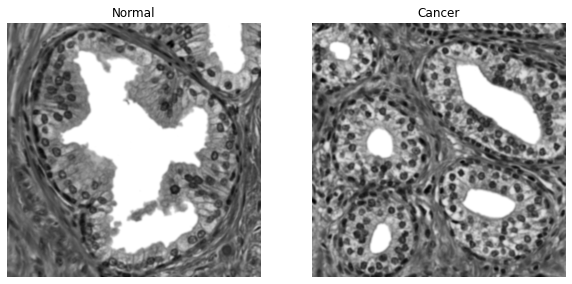

In [3]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(gray_nimage, cmap=plt.cm.gray)
plt.title('Normal')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gray_cimage, cmap=plt.cm.gray)
plt.title('Cancer')
plt.axis('off')
plt.show()

# **Edge**

Compute x, y gradients - Sobel

In [5]:
# sobel filter, 아래 dict는 행렬이다.
# 주어진 image에 각각을 apply를 하면,
from scipy import ndimage as nd

grad_x = nd.convolve(gray_cimage, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
grad_y = nd.convolve(gray_cimage, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]))

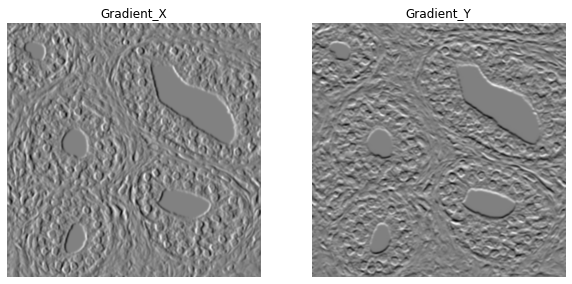

In [6]:
# x방향으로, y방향으로 얼마나 많이 변하는지
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(grad_x, cmap=plt.cm.gray)
plt.title('Gradient_X')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(grad_y, cmap=plt.cm.gray)
plt.title('Gradient_Y')
plt.axis('off')
plt.show()

Compute magnitude and direction

In [7]:
# magnitude = root(x^2+y^2)
mag = np.sqrt(np.power(grad_x,2) + np.power(grad_y,2))
theta = np.arctan2(np.power(grad_y,2), np.power(grad_x,2))

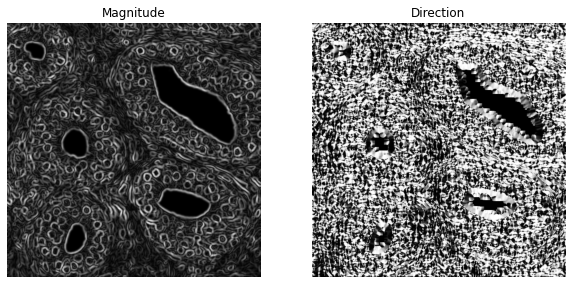

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mag, cmap=plt.cm.gray)
plt.title('Magnitude')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(theta, cmap=plt.cm.gray)
plt.title('Direction')
plt.axis('off')
plt.show()

Extract edges

(-0.5, 511.5, 511.5, -0.5)

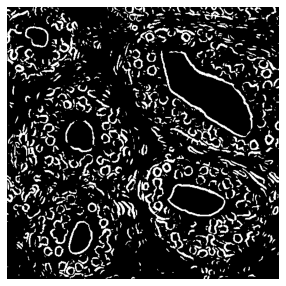

In [9]:
# mag 값으로 threshold, 0.5 이상
plt.figure(figsize=(5,5))
im = mag > 0.5
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')

Use Sobel operator

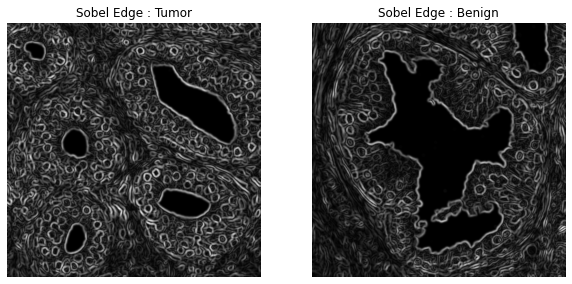

In [14]:
# sobel filter pkg에 바로 넣어주면 된다.
from skimage import filters

sobel_cimage = filters.sobel(gray_cimage)
sobel_nimage = filters.sobel(gray_nimage)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(sobel_cimage, cmap=plt.cm.gray)
plt.title('Sobel Edge : Tumor')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sobel_nimage, cmap=plt.cm.gray)
plt.title('Sobel Edge : Benign')
plt.axis('off')
plt.show()

Use Canny edge detector

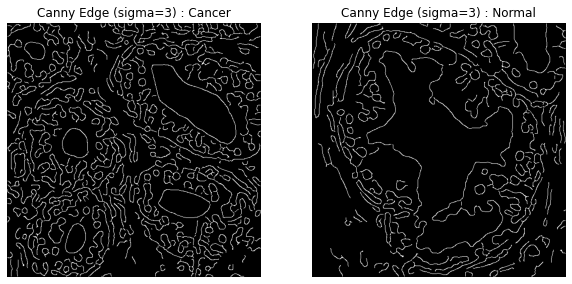

In [15]:
from skimage import feature

canny_cimage = feature.canny(gray_cimage, sigma=3)
canny_nimage = feature.canny(gray_nimage, sigma=3)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(canny_cimage, cmap=plt.cm.gray)
plt.title('Canny Edge (sigma=3) : Cancer')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(canny_nimage, cmap=plt.cm.gray)
plt.title('Canny Edge (sigma=3) : Normal')
plt.axis('off')
plt.show()

# **GLCM**

Compute grey level co-occurence matrix
- a와 b가 거리가 얼마나 떨어져 있는지, 어느 방향으로 인지 등 (같은 쌍이라면 분포도 같지 않을까 해서)

In [16]:
# grey level co-occurence matrix
from skimage.feature import greycomatrix, greycoprops #corps 계산하는 것

In [42]:
# 빈도수 계산
# typically 256 for an 8-bit image, 256 x 256이 결과가 되어서 임의로 level을 조절해서 계산한다.
# 0 ~ 1 사이의 Grayscale 값을 (level-1)을 곱해서 0~31까지 integer, 정수로 변환
# 256에서 0~31로 mapping, 0 ~ 7까지가 하나로 표현됨.
# 거리 : [1, 10] 한 픽셀 떨어져있고, 열 픽셀 떨어져있고
# 각도 : [0, np.pi/4, np.pi/2] 0, 45도, 90도
level = 32 
ccomatrix = greycomatrix(np.uint8((level-1)*gray_cimage), [1, 10], [0, np.pi/4, np.pi/2], level, symmetric=True, normed=True)
ncomatrix = greycomatrix(np.uint8((level-1)*gray_nimage), [1, 10], [0, np.pi/4, np.pi/2], level, symmetric=True, normed=True)

print(ccomatrix.shape)
# 결과 : 32 by 32, 거리에 1, 10 줘서 2가지, 방향 3개 줬으니까 3
# 총 6개 계산됨
# 이 결과물을 바로 사용하지는 않고 다른 값을 계산하여 사용

(32, 32, 2, 3)


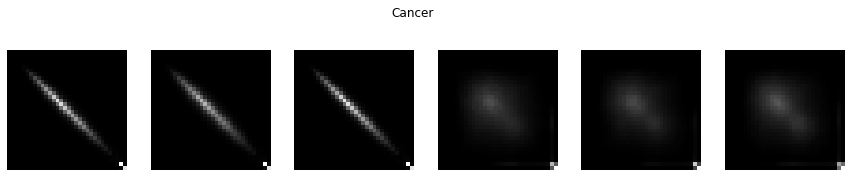

In [43]:
# cancer image
plt.figure(figsize=(15,3))
id=1
for i in np.arange(0,2):
  for j in np.arange(0,3):
    plt.subplot(1,6,id)
    plt.imshow(ccomatrix[:,:,i,j], cmap=plt.cm.gray)
    plt.axis('off')
    id = id + 1
plt.suptitle('Cancer')
plt.show()

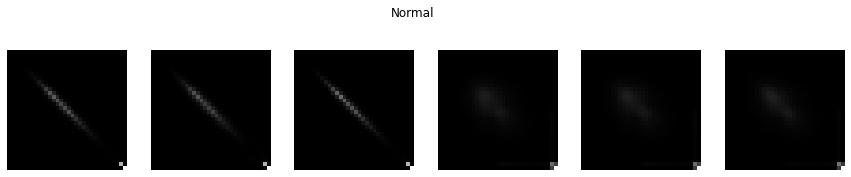

In [22]:
# normal image
plt.figure(figsize=(15,3))
id=1
for i in np.arange(0,2):
  for j in np.arange(0,3):
    plt.subplot(1,6,id)
    plt.imshow(ncomatrix[:,:,i,j], cmap=plt.cm.gray)
    plt.axis('off')
    id = id + 1
plt.suptitle('Normal')
plt.show()

Compute features using GLCM

In [24]:
# energy를 따로 계산해서 값을 이용함.
cglcm_feat = greycoprops(ccomatrix, 'energy')
nglcm_feat = greycoprops(ncomatrix, 'energy')

print(cglcm_feat.shape)

(2, 3)


In [25]:
# 이 값자체로 이미지에 어떤 값이 매칭이 된다고는 설명할 수 없다
# 하지만 이미지를 여러개 두고 본다면, 전체적인 거리와 방향의 조합으로 봤을 때 분류가 가능하다면 사용하는 것
cglcm_feat = cglcm_feat.reshape(-1,)
nglcm_feat = nglcm_feat.reshape(-1,)
print('Cancer : ', end='\t')
for t in cglcm_feat:
  print('{:.3f}'.format(t), end='\t')
print()
print('Normal : ', end='\t')
for b in nglcm_feat:
  print('{:.3f}'.format(b), end='\t')


Cancer : 	0.125	0.112	0.125	0.064	0.066	0.064	
Normal : 	0.185	0.175	0.189	0.123	0.124	0.126	

# **Gabor Filters**

In [27]:
from skimage.filters import gabor, gabor_kernel

Apply a Gabor filter

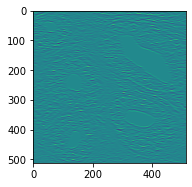

In [28]:
# garbor filter : 이미지, freq, 각도 주면 filtering된 이미지를 뱉는다.
# 하나의 필터 보다는 여러개인 filter bank를 사용한다.
filt_real, _ = gabor(gray_cimage, frequency=0.2, theta=np.pi/2)

plt.subplot(1,2,1)
plt.imshow(filt_real)
plt.show()

Visualize a Gabor kernel

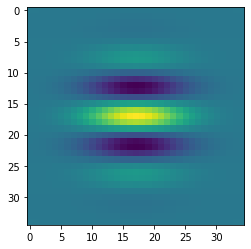

In [29]:
# freq, 각도 주고 먼저 필터의 형태를 보자
gk = gabor_kernel(0.1, theta=np.pi/2)

plt.imshow(gk.real)
plt.show()

Let's generate Gabor filter banks

In [31]:
# freq 다르게, 방향 다르게 해서 filter를 여러개 만들어서 같이 사용하면 된다.
# 나만의 필터 제작. (예시에는 9개)
gkernels = []
for frequency in (0.08, 0.1, 0.2):
  for theta in (0, np.pi/4, np.pi/2):
    gk = gabor_kernel(frequency, theta=theta)
    gkernels.append(gk.real)

In [32]:
[gk.shape for gk in gkernels]

[(45, 45),
 (31, 31),
 (45, 45),
 (35, 35),
 (25, 25),
 (35, 35),
 (19, 19),
 (13, 13),
 (19, 19)]

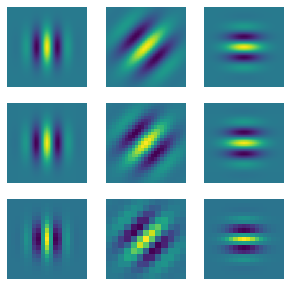

In [33]:
# 시각화 / 실제 크기가 다르지만, pyplot으로 같은 사이즈로 보여주기 때문에 차이가 없어보인다.
plt.figure(figsize=(5,5))
id=1
for id, gk in enumerate(gkernels):
  plt.subplot(3,3,id+1)
  plt.imshow(gk.real)
  plt.axis('off')


Apply Gabor filter bank

In [34]:
from scipy import ndimage as nd

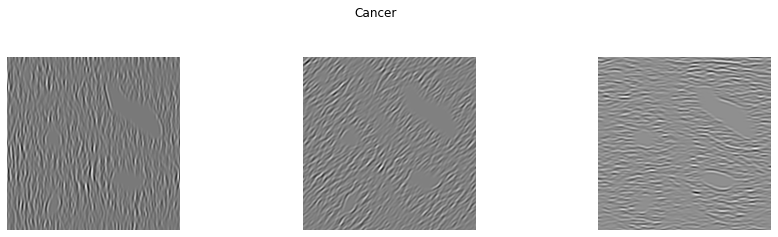

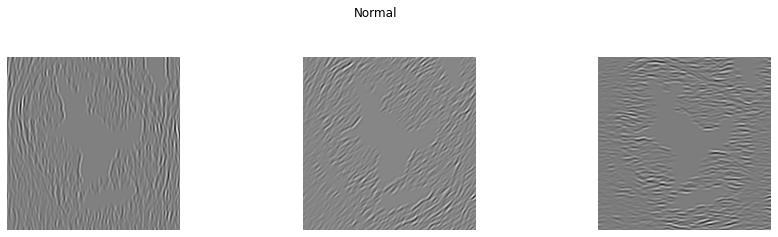

In [44]:
# nd.convolve를 사용, 이미지에 커널 하나하나 대입해주면 아래 이미지와 같다. 3개씩만 보기
# 필터를 사용한다고 눈에 뭔가 확 들어오거나 하지는 않는다.
# 그래서...
fig = plt.figure(figsize=(15,7))

for id in np.arange(0, 3):
  plt.subplot(2, 3, id+1)
  cgkimage = nd.convolve(gray_cimage, gkernels[id+3])
  plt.imshow(cgkimage, cmap=plt.cm.gray)
  plt.axis('off')
fig.suptitle('Cancer')
plt.show()

fig = plt.figure(figsize=(15,7))

for id in np.arange(0, 3):
  plt.subplot(2, 3, id+1)
  ngkimage = nd.convolve(gray_nimage, gkernels[id+3])
  plt.imshow(ngkimage, cmap=plt.cm.gray)
  plt.axis('off')
fig.suptitle('Normal')
plt.show()

Compute Gabor features

In [36]:
# 그래서 값을 계산한다.
# kernel 하나하나 적용하면서, 평균, 분산, 제곱해서 전체 크기로 나누는 파워도 계산.
from scipy import ndimage as nd

def compute_gabor_features(image, gkernels):
  features = np.zeros((len(gkernels), 3), dtype=np.double)
  for id, gk in enumerate(gkernels):
    gkimage = nd.convolve(image, gk.real)
    features[id, 0] = gkimage.mean()
    features[id, 1] = gkimage.var()
    features[id, 2] = np.sum(np.power(gkimage, 2)) / (gkimage.shape[0] * gkimage.shape[1])
  
  return features

In [37]:
cgabor_feat = compute_gabor_features(gray_cimage, gkernels)
ngabor_feat = compute_gabor_features(gray_nimage, gkernels)

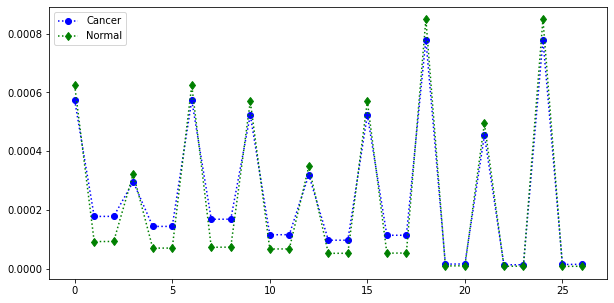

In [38]:
# [freq 3, 각도 3 = filter bank 9개] * [평균, 분산, pow] 3개 = 27개 (0 ~ 26)
# 다 모아서 학습하면 땡!
cgabor_feat = cgabor_feat.reshape(-1,)
ngabor_feat = ngabor_feat.reshape(-1,)

plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(cgabor_feat)), cgabor_feat, 'bo:', label="Cancer")
plt.plot(np.arange(0, len(ngabor_feat)), ngabor_feat, 'gd:', label="Normal")
plt.legend(loc="best")
plt.show()

# **LBP**

Compute LBPs

In [45]:
from skimage.feature import local_binary_pattern

In [46]:
# center에서 주변에 어느정도 거리에 있는, 몇개와 비교할껀지
P = 16
R = 2
METHOD = 'uniform'  # 'default', 'ror', 'var' 등도 사용가능

clbp = local_binary_pattern(gray_cimage, P, R, METHOD)
nlbp = local_binary_pattern(gray_nimage, P, R, METHOD)

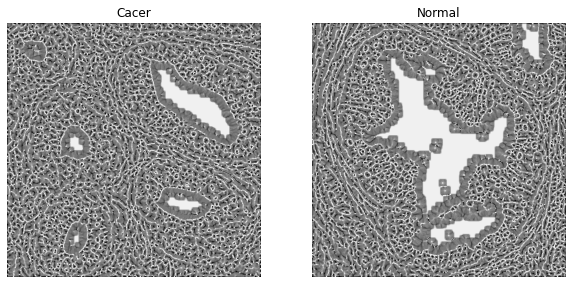

In [47]:
# 각 pixel에 대해서 Local Binary Pattern을 계산한 결과.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(clbp, cmap=plt.cm.gray)
plt.title('Cacer')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(nlbp, cmap=plt.cm.gray)
plt.title('Normal')
plt.axis('off')
plt.show()

Compute histograms

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


<AxesSubplot:>

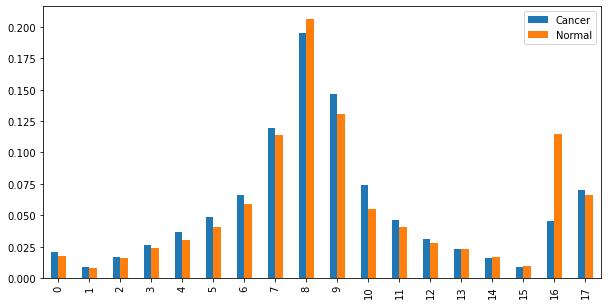

In [56]:
# 이미지로는 할 수 있는게 없어서 histogram을 많이 계산한다.
rmax = np.uint8(np.max([clbp.max(), nlbp.max()]))

clbp_hist, _ = np.histogram(clbp.reshape(-1,), normed=True, bins=rmax+1, range=(0, rmax+1))
nlbp_hist, _ = np.histogram(nlbp.reshape(-1,), normed=True, bins=rmax+1, range=(0, rmax+1))

# 0 ~ 17 각각이 특정한 binary code를 나타낸다.
# uniform이므로, 이 중 하나는 다른 모든것을 합쳐놓은 것이 있다.
hists = pd.DataFrame({'Cancer': clbp_hist, 'Normal': nlbp_hist})
hists.plot(kind='bar', figsize=(10,5), legend=True)

Compute multi-scale LBPs

In [55]:
# 거리와 갯수를 다양하게 줘서 아래와 같이 그래프로 그릴 수 있다.
P = 16; R = 2; METHOD = 'uniform'
clbp = local_binary_pattern(gray_cimage, P, R, METHOD)
nlbp = local_binary_pattern(gray_nimage, P, R, METHOD)

P = 24; R = 3; METHOD = 'uniform'
clbp2 = local_binary_pattern(gray_cimage, P, R, METHOD)
nlbp2 = local_binary_pattern(gray_nimage, P, R, METHOD)

Compute multi-dimensional histograms

In [52]:
rmax = np.uint8(np.max([clbp.max(), nlbp.max()]))
rmax2 = np.uint8(np.max([clbp2.max(), nlbp2.max()]))

In [53]:
clbp_mhist, _, _ = np.histogram2d(clbp.reshape(-1,), clbp2.reshape(-1,), normed=True, bins=[rmax+1, rmax2+1], range=[[0,rmax+1], [0,rmax2+1]])
nlbp_mhist, _, _ = np.histogram2d(nlbp.reshape(-1,), nlbp2.reshape(-1,), normed=True, bins=[rmax+1, rmax2+1], range=[[0,rmax+1], [0,rmax2+1]])

Draw multi-dimensional histograms

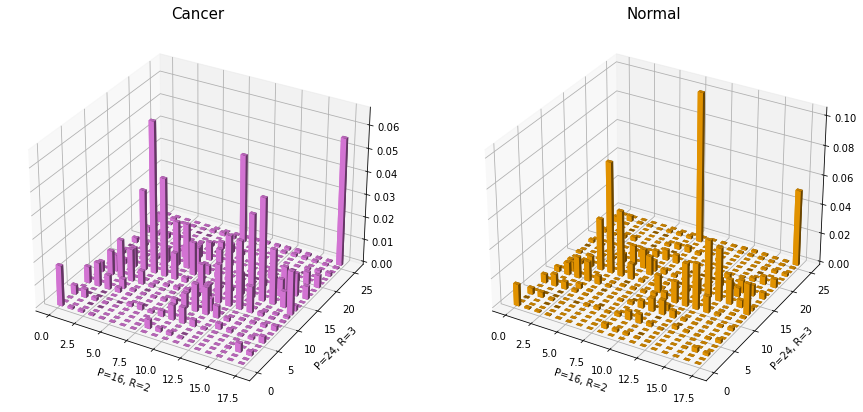

In [54]:
x = np.arange(0, rmax+1)
y = np.arange(0, rmax2+1)
xs, ys = np.meshgrid(x, y)

xs = xs.reshape(-1,)
ys = ys.reshape(-1,)
clbp_mhist = clbp_mhist.reshape(-1,)
nlbp_mhist = nlbp_mhist.reshape(-1,)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.bar3d(xs, ys, 0, 0.5, 0.5, clbp_mhist, color='violet')
ax.set_xlabel('P=16, R=2')
ax.set_ylabel('P=24, R=3')
ax.set_title('Cancer', fontdict={'fontsize':15})
ax = fig.add_subplot(1,2,2, projection='3d')
ax.bar3d(xs, ys, 0, 0.5, 0.5, nlbp_mhist, color='orange')
ax.set_xlabel('P=16, R=2')
ax.set_ylabel('P=24, R=3')
ax.set_title('Normal', fontdict={'fontsize':15})
plt.show()
